# 최근접 이웃(K-Nearest Neighbor)

#### 유유상종 = 끼리끼리 = K-NN 알고리즘 = 서로 비슷한 속성끼리 모이는 경향

* 특별한 예측 모델 없이 가장 가까운 데이터 포인트를 기반으로 예측을 수행하는 방법
* 거리 기반 분류분석 모델(비지도 학습인 K-means와 다름)
* 분류와 회귀 모두 지원
- 지도 학습
- 거리 측정 시, 일반적으로 '유클라디안 거리' 계산법 사용
- 측정한 거리가 작은 순으로 k 개수의 데이터를 찾음
- 판별하고 싶은 데이터와 인접한 K 개수의 데이터를 찾아, 해당 데이터의 라벨이 다수인 범주로 데이터를 분류하는 방식


[K의 의미]
- 이웃의 개수 or 주변 데이터의 개수
- 홀수로 설정(2:2와 같은 동점 상황 피하기 위함)
- 주관적이므로 적당한 값을 정해야 함
- K값에 따라 분류결과, 정확도, 신뢰도 다름
- K값을 선택하면서 시행착오 필수

[장단점]
- 장점: 간단한 구조 / 이해 용이 / 구현 용이 / 강력한 결과 / 데이터가 적어도 모델 구현 가능
- 단점: 특징과 클래스 간 관계 이해 제한 / 적절한 K값 선택 필요 / 데이터가 많으면 분류 단계 느림 / 명목 특징 및 누락 데이터를 위한 추가 처리 필요(ex. 더미 코딩)

[주의점]
- 각 변수마다 범위 상이하여 재조정 필요(ex. 몸무게 단위 =/= 키 단위)
- '최소-최대 정규화' 또는 'z-점수 표준화'
- 실무에서는 'z-점수 표준화' 많이 사용

[모델 종류]
- KNeighborsClassifier() = 범주형 분류기로 사용  
- KNeighborsRegressor = 연속형 값 예측

![k nearest neighbor](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)


### references

[데이터 마케팅 공부방](https://m.blog.naver.com/bestinall/221760380344)  
[K-NN 알고리즘](https://velog.io/@jhlee508/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-KNNK-Nearest-Neighbor-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98)  
[2. 지도 학습 알고리즘 (1) k-Nearest Neighbors(k-NN)](https://jhryu1208.github.io/data/2020/10/25/SUPERVISED_LEARNING_1_k-NN.md/)  
[fit_transform, transform의 차이점](https://deepinsight.tistory.com/165)  
[아무튼 워라벨](https://hleecaster.com/ml-knn-classifier-example/)

In [ ]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

## K 최근접 이웃 분류

* 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트가 출력
* k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

### 붓꽃 데이터

In [ ]:
iris = load_iris()

In [ ]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# 데이터 분할
X, y = load_iris(return_X_y=True) # feature X와 Target y로 반환
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# 데이터 표준화
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test) # train 데이터에 대해서 fit한 다음, 이 결과에 대해서 transform만 한다.

In [ ]:
# 모델 생성 및 학습(scale 하기 전 데이터로 학습)
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# 평가 점수 확인
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# 모델 생성 및 학습(scale 한 데이터로 학습)
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

print('학습 데이터 점수: {}'.format(model.score(X_train_scale, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test_scale, y_test)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# 교차 검증
cross_validate(estimator = KNeighborsClassifier(), 
               X=X, y=y, cv=5, 
               n_jobs=multiprocessing.cpu_count(),
               verbose=True) # 상세한 설명 출력

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.0s finished


{'fit_time': array([0.00100732, 0.00115371, 0.00083256, 0.00075793, 0.00093818]),
 'score_time': array([0.00333953, 0.00357294, 0.0029273 , 0.00290728, 0.00307393]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [ ]:
param_grid = [{'n_neighbors':[3,5,7], # neighbors 설정
               # uniform: 각 이웃이 동일한 가중치, distance: 가까운 이웃이 멀리 있는 이웃보다 큰 가중치
               'weights': ['uniform', 'distance']
               'algorithm': ['ball_tree', 'kd_tree', 'brute']}] # 알고리즘 설정

In [ ]:
gs = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose = True 
)

In [ ]:
gs.fit(X,y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=2,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [ ]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9800000000000001


In [ ]:
# 시각화를 위한 함수 작성
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out

In [ ]:
# 저차원 변환
tsne = TSNE(n_components=2) # feature 개수 설정 
X_comp = tsne.fit_transform(X)

In [ ]:
iris_comp_df = pd.DataFrame(data=X_comp)
iris_comp_df['Target'] = y
iris_comp_df

,0,1,Target
0,9.496624,-22.911732,0
1,9.005003,-20.472885,0
2,10.085077,-20.283838,0
3,9.881342,-19.997137,0
4,9.973147,-23.018051,0
...,...,...,...
145,-10.331134,7.056452,2
146,-7.470014,8.469797,2
147,-9.553185,7.498786,2
148,-11.251093,7.145658,2


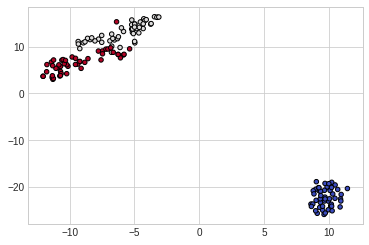

In [ ]:
plt.scatter(X_comp[:, 0], X_comp[:, 1],
            c=y, 
            cmap = plt.cm.coolwarm, # 색상 설정
            s=20, edgecolors='k')

In [ ]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

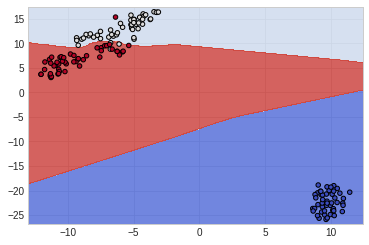

In [ ]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

### 유방암 데이터

In [ ]:
cancer = load_breast_cancer()

In [ ]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['Target'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
X, y =cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [ ]:
# train 데이터 확인
cancer_train_df = pd.DataFrame(X_train, columns=cancer.feature_names)
cancer_train_df['Target'] = y_train
cancer_train_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,12.25,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.02331,0.1970,0.06228,0.2200,0.9823,1.484,16.51,0.005518,0.01562,0.01994,0.007924,0.017990,0.002484,13.59,25.22,86.60,564.2,0.1217,0.1788,0.1943,0.08211,0.3113,0.08132,1
1,11.45,20.97,73.81,401.5,0.11020,0.09362,0.04591,0.02233,0.1842,0.07005,0.3251,2.1740,2.077,24.62,0.010370,0.01706,0.02586,0.007506,0.018160,0.003976,13.11,32.16,84.53,525.1,0.1557,0.1676,0.1755,0.06127,0.2762,0.08851,1
2,15.53,33.56,103.70,744.9,0.10630,0.16390,0.17510,0.08399,0.2091,0.06650,0.2419,1.2780,1.903,23.02,0.005345,0.02556,0.02889,0.010220,0.009947,0.003359,18.49,49.54,126.30,1035.0,0.1883,0.5564,0.5703,0.20140,0.3512,0.12040,0
3,11.80,17.26,75.26,431.9,0.09087,0.06232,0.02853,0.01638,0.1847,0.06019,0.3438,1.1400,2.225,25.06,0.005463,0.01964,0.02079,0.005398,0.014770,0.003071,13.45,24.49,86.00,562.0,0.1244,0.1726,0.1449,0.05356,0.2779,0.08121,1
4,10.65,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,0.2497,1.4930,1.497,16.64,0.007189,0.01035,0.01081,0.006245,0.021580,0.002619,12.25,35.19,77.98,455.7,0.1499,0.1398,0.1125,0.06136,0.3409,0.08147,1


In [ ]:
# test 데이터 확인
cancer_test_df = pd.DataFrame(X_test, columns=cancer.feature_names)
cancer_test_df['Target'] = y_test
cancer_test_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,14.97,16.95,96.22,685.9,0.09855,0.07885,0.02602,0.03781,0.1780,0.05650,0.2713,1.2170,1.8930,24.280,0.005080,0.01370,0.007276,0.009073,0.01350,0.001706,16.11,23.00,104.60,793.7,0.1216,0.1637,0.06648,0.08485,0.2404,0.06428,1
1,16.03,15.51,105.80,793.2,0.09491,0.13710,0.12040,0.07041,0.1782,0.05976,0.3371,0.7476,2.6290,33.270,0.005839,0.03245,0.037150,0.014590,0.01467,0.003121,18.76,21.98,124.30,1070.0,0.1435,0.4478,0.49560,0.19810,0.3019,0.09124,0
2,14.80,17.66,95.88,674.8,0.09179,0.08890,0.04069,0.02260,0.1893,0.05886,0.2204,0.6221,1.4820,19.750,0.004796,0.01171,0.017580,0.006897,0.02254,0.001971,16.43,22.74,105.90,829.5,0.1226,0.1881,0.20600,0.08308,0.3600,0.07285,1
3,12.36,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,0.06066,0.1199,0.8944,0.8484,9.227,0.003457,0.01047,0.011670,0.005558,0.01251,0.001356,13.29,27.49,85.56,544.1,0.1184,0.1963,0.19370,0.08442,0.2983,0.07185,1
4,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,1.8510,26.330,0.011270,0.03498,0.021870,0.019650,0.01580,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784,1


In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
# scale 전 점수
model = KNeighborsClassifier()
model.fit(X_train, y_train)

print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9516483516483516
평가 데이터 점수: 0.8947368421052632


In [ ]:
# scale 후 점수
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

print('학습 데이터 점수: {}'.format(model.score(X_train_scale, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.9868131868131869
평가 데이터 점수: 0.9210526315789473


In [ ]:
estimator = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [ ]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs =multiprocessing.cpu_count(),
    verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.9s finished


{'fit_time': array([0.00347733, 0.00347137, 0.00333786, 0.00314045, 0.00308275]),
 'score_time': array([0.02340031, 0.0124166 , 0.01172662, 0.01196837, 0.00652194]),
 'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])}

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsClassifier())])

In [ ]:
param_grid = [{'model__n_neighbors': [3,5,7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [ ]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
         

In [ ]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9701288619779538


In [ ]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [ ]:
cancer_comp_df = pd.DataFrame(data=X_comp)
cancer_comp_df['target']=y
cancer_comp_df.head()

,0,1,target
0,34.008995,-4.196138,0
1,31.448526,-5.388494,0
2,28.790648,-1.287871,0
3,-12.552676,-9.374581,0
4,26.367689,-1.516763,0


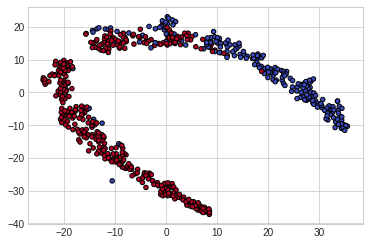

In [ ]:
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [ ]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: The following kwargs were not used by contour: 's'
  if sys.path[0] == '':


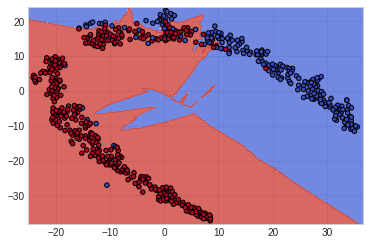

In [ ]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, s=20, alpha=.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

### 와인 데이터

In [ ]:
wine = load_wine()

In [ ]:
wine_df = pd.DataFrame(data=wine.data, columns = wine.feature_names)
wine_df['target'] = wine.target
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [ ]:
# train 데이터 확인
wine_train_df = pd.DataFrame(data=X_train, columns = wine.feature_names)
wine_train_df['Target'] = y_train
wine_train_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,12.72,1.81,2.20,18.8,86.0,2.20,2.53,0.26,1.77,3.90,1.16,3.14,714.0,1
1,14.10,2.02,2.40,18.8,103.0,2.75,2.92,0.32,2.38,6.20,1.07,2.75,1060.0,0
2,11.61,1.35,2.70,20.0,94.0,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680.0,1
3,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855.0,2
4,12.04,4.30,2.38,22.0,80.0,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580.0,1


In [ ]:
# test 데이터 확인
wine_test_df = pd.DataFrame(data=X_test, columns = wine.feature_names)
wine_test_df['Target'] = y_test
wine_test_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880.0,0
1,13.67,1.25,1.92,18.0,94.0,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630.0,1
2,13.68,1.83,2.36,17.2,104.0,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990.0,0
3,12.51,1.73,1.98,20.5,85.0,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672.0,1
4,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0,1


In [ ]:
# 데이터 표준화
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
# scale 전 점수
model = KNeighborsClassifier()
model.fit(X_train, y_train)

print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.7816901408450704
평가 데이터 점수: 0.7222222222222222


In [ ]:
# scale 후 점수
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

print('학습 데이터 점수: {}'.format(model.score(X_train_scale, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.9788732394366197
평가 데이터 점수: 0.9444444444444444


In [ ]:
estimator = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [ ]:
cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv=5, 
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.8s finished


{'fit_time': array([0.00248957, 0.00223255, 0.00196028, 0.00243568, 0.0018146 ]),
 'score_time': array([0.00394821, 0.00388169, 0.00339508, 0.00356555, 0.00334501]),
 'test_score': array([0.94444444, 0.94444444, 0.97222222, 1.        , 0.88571429])}

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsClassifier())])

In [ ]:
param_grid = [{'model__n_neighbors': [3,5,7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm':['ball_tree', 'kd_tree', 'brute']}]

In [ ]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
         

In [ ]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=7, p=2,
                                      weights='uniform'))],
         verbose=False)

In [ ]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9665079365079364


In [ ]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [ ]:
wine_comp_df = pd.DataFrame(X_comp)
wine_comp_df['target'] = y
wine_comp_df.head()

,0,1,target
0,-8.770708,9.086160,0
1,-8.038900,9.461490,0
2,-10.259958,10.797053,0
3,-12.693779,12.286836,0
4,-1.851501,3.569824,0


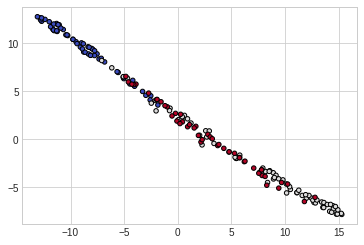

In [ ]:
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [ ]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: The following kwargs were not used by contour: 's'
  if sys.path[0] == '':


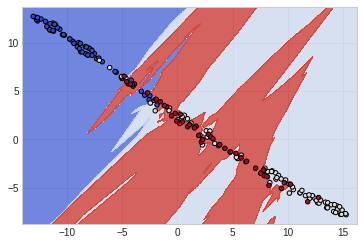

In [ ]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, s=20, alpha=.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

## k 최근접 이웃 회귀

* k 최근접 이웃 분류와 마찬가지로 예측에 이웃 데이터 포인트 사용
* 이웃 데이터 포인트의 평균이 예측 결과

### 보스턴 주택 가격 데이터

In [ ]:
boston = load_boston()

In [ ]:
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['TARGET'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [ ]:
# train 데이터 확인
boston_train_df = pd.DataFrame(X_train, columns = boston.feature_names)
boston_train_df['TARGET'] = y_train
boston_train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,6.53876,0.0,18.10,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0
1,0.19186,0.0,7.38,0.0,0.493,6.431,14.7,5.4159,5.0,287.0,19.6,393.68,5.08,24.6
2,0.02899,40.0,1.25,0.0,0.429,6.939,34.5,8.7921,1.0,335.0,19.7,389.85,5.89,26.6
3,0.22188,20.0,6.96,1.0,0.464,7.691,51.8,4.3665,3.0,223.0,18.6,390.77,6.58,35.2
4,0.20608,22.0,5.86,0.0,0.431,5.593,76.5,7.9549,7.0,330.0,19.1,372.49,12.50,17.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.09065,20.0,6.96,1.0,0.464,5.920,61.5,3.9175,3.0,223.0,18.6,391.34,13.65,20.7
400,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
401,0.09103,0.0,2.46,0.0,0.488,7.155,92.2,2.7006,3.0,193.0,17.8,394.12,4.82,37.9
402,0.19133,22.0,5.86,0.0,0.431,5.605,70.2,7.9549,7.0,330.0,19.1,389.13,18.46,18.5


In [ ]:
# test 데이터 확인
boston_test_df = pd.DataFrame(data=X_test, columns = boston.feature_names)
boston_test_df['TARGET'] = y_test
boston_test_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,1.51902,0.0,19.58,1.0,0.605,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
1,5.82401,0.0,18.10,0.0,0.532,6.242,64.7,3.4242,24.0,666.0,20.2,396.90,10.74,23.0
2,4.81213,0.0,18.10,0.0,0.713,6.701,90.0,2.5975,24.0,666.0,20.2,255.23,16.42,16.4
3,0.21409,22.0,5.86,0.0,0.431,6.438,8.9,7.3967,7.0,330.0,19.1,377.07,3.59,24.8
4,0.04684,0.0,3.41,0.0,0.489,6.417,66.1,3.0923,2.0,270.0,17.8,392.18,8.81,22.6


In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
# scale 전 점수
model = KNeighborsRegressor()
model.fit(X_train, y_train)

print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.6531281216555292
평가 데이터 점수: 0.5459059502594357


In [ ]:
# scale 후 점수
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

print('학습 데이터 점수: {}'.format(model.score(X_train_scale, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.8434141253273507
평가 데이터 점수: 0.6828428814486094


In [ ]:
estimator = make_pipeline(StandardScaler(), KNeighborsRegressor())

In [ ]:
cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv=5, 
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00722265, 0.0030067 , 0.00236893, 0.00227642, 0.00216699]),
 'score_time': array([0.00654292, 0.00651956, 0.00308299, 0.00346708, 0.00176191]),
 'test_score': array([0.56089547, 0.61917359, 0.48661916, 0.46986886, 0.23133037])}

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsRegressor())])

In [ ]:
param_grid = [{'model__n_neighbors': [3,5,7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm':['ball_tree', 'kd_tree', 'brute']}]

In [ ]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        KNeighborsRegressor(algorithm='auto',
                                                            leaf_size=30,
                                                            metric='minkowski',
                                                            metric_params=None,
                                                            n_jobs=None,
                                                            n_neighbors=5, p=2,
                                                            weights='uniform'))],
                                verbose=False),
             iid

In [ ]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=7, p=2,
                                     weights='distance'))],
         verbose=False)

In [ ]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.4973060611762845


In [ ]:
tsne = TSNE(n_components=1) # regressor이므로 1차원으로 변경한다.
X_comp = tsne.fit_transform(X)

In [ ]:
boston_comp_df = pd.DataFrame(data=X_comp)
boston_comp_df['target']=y
boston_comp_df.head()

,0,target
0,-16.000826,24.0
1,-44.444931,21.6
2,-40.774178,34.7
3,-41.684898,33.4
4,-41.951572,36.2


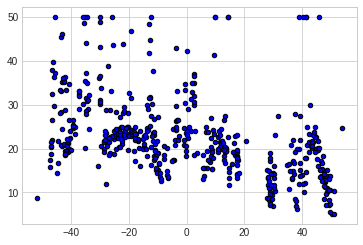

In [ ]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [ ]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

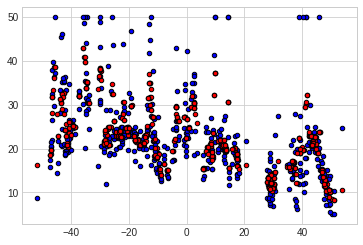

In [ ]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k')

### 캘리포니아 주택 가격 데이터

In [ ]:
california = fetch_california_housing()

In [ ]:
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df['TARGET'] = california.target
california_df.head()

In [ ]:
X, y = california.data, california.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [ ]:
# train 데이터 확인
california_train_df = pd.DataFrame(X_train, columns = california.feature_names)
california_train_df['TARGET'] = y_train
california_train_df

In [ ]:
# test 데이터 확인
california_test_df = pd.DataFrame(data=X_test, columns = california.feature_names)
california_test_df['TARGET'] = y_test
california_test_df

In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
# scale 전 점수
model = KNeighborsRegressor()
model.fit(X_train, y_train)

print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

In [ ]:
# scale 후 점수
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

print('학습 데이터 점수: {}'.format(model.score(X_train_scale, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test_scale, y_test)))

In [ ]:
estimator = make_pipeline(StandardScaler(), KNeighborsRegressor())

In [ ]:
cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv=5, 
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsRegressor())])

In [ ]:
param_grid = [{'model__n_neighbors': [3,5,7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm':['ball_tree', 'kd_tree', 'brute']}]

In [ ]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
gs.fit(X, y)

In [ ]:
gs.best_estimator_

In [ ]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

In [ ]:
tsne = TSNE(n_components=1) # regressor이므로 1차원으로 변경한다.
X_comp = tsne.fit_transform(X)

In [ ]:
boston_comp_df = pd.DataFrame(data=X_comp)
boston_comp_df['target']=y
boston_comp_df.head()

In [ ]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [ ]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

In [ ]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k')

### cf. 보스턴 주택 가격 데이터(최적 k값 찾기)

In [ ]:
boston = load_boston()
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [ ]:
model =KNeighborsRegressor()
model.fit(X_train, y_train)

print('scale 전 학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('scale 전 평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

model =KNeighborsRegressor()
model.fit(X_train_scale, y_train)

print('scale 후 학습 데이터 점수: {}'.format(model.score(X_train_scale, y_train)))
print('scale 후 평가 데이터 점수: {}'.format(model.score(X_test_scale, y_test)))

In [ ]:
k_list = range(1,101, 2)
accuracies = []

for k in k_list:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scale, y_train)
    accuracies.append(model.score(X_test_scale, y_test))
    
plt.figure(figsize=(8,6))    
plt.plot(k_list, accuracies)
plt.title('Accuracy', fontsize=15)
plt.xlabel('k')
plt.ylabel('test score(accuracy)')

In [ ]:
df = pd.DataFrame(k_list, accuracies).reset_index()
df.columns = ['accuracy', 'k']
df.sort_values(by='accuracy', ascending=False)